# Exploring Solar Plant Generation Data


## **1.** About the Dataset
This project uses a solar plant generation dataset [available on Kaggle](https://www.kaggle.com/anikannal/solar-power-generation-data).


## **2.** Imports & Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler


pd.set_option('display.max_rows', 200)

---

## **3.** Load Data

### **3.1.** Load Data w/ Jupyter Notebooks/Lab
```
# Run this code if using Jupyter Notebooks/Lab
df = pd.read_csv('./data/robust_sub.csv')
```

### **3.2.** Access & Load Data w/ Google Drive

In [2]:
# run this cell if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load generation data from plant #1
gen_path = '/content/drive/MyDrive/Colab Notebooks/PP_projects/solarPlant/data/Plant_1_Generation_Data.csv'
gen_df = pd.read_csv(gen_path)

In [4]:
# load weather data from plant #1
weather_path = '/content/drive/MyDrive/Colab Notebooks/PP_projects/solarPlant/data/Plant_1_Weather_Sensor_Data.csv'
weather_df = pd.read_csv(weather_path)

---

## **4.** Detail & Clean


### **4.1.** Detail Generation DataFrame
First, let's review a few characteristics of our dataset.

In [5]:
gen_df[gen_df['SOURCE_KEY'] == '1BY6WEcLGh8j5v7'].head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
21,15-05-2020 00:15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
42,15-05-2020 00:30,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
63,15-05-2020 00:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
84,15-05-2020 01:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0


In [6]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


### **4.2.** Detail Weather DataFrame


In [7]:
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [9]:
# double-check that all data comes from same plant
weather_df['SOURCE_KEY'].value_counts()

HmiyD2TTLFNqkNe    3182
Name: SOURCE_KEY, dtype: int64

### 4.3. Merge Dataframes
We will merge the DataFrames on both the 'PLANT_ID' and 'DATE_TIME' columns.

First, let's convert the 'DATE_TIME' columns to compatible DateTime formats. 

In [10]:
gen_df['DATE_TIME'] = pd.to_datetime(gen_df['DATE_TIME'], 
                                     format='%d-%m-%Y %H:%M')


# pd.to_datetime seems to have a quirk df.head() will not display the full 
# DATE_TIME if end values are 0, unless it has other non-0 values to display

gen_df.head(25)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15 00:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15 00:00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15 00:00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15 00:00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15 00:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [11]:
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], 
                                         format='%Y-%m-%d %H:%M:%S')
weather_df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


Now that the columns we'll merge on are in the same format, we can perform the merge.

In [12]:
df = pd.merge(gen_df, weather_df,  how='left', on = ['DATE_TIME', 'PLANT_ID'])
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


### 4.4. DateTime Breakout
We may want to more easily select particular days or times, so we'll break those values out of our 'DATE_TIME' column.

In [13]:
df['DAY'] = df['DATE_TIME'].dt.strftime('%Y-%m-%d')
df['TIME'] = df['DATE_TIME'].dt.strftime('%H:%M')
df['MONTH'] = df['DATE_TIME'].dt.month
df['HOUR'] = df['DATE_TIME'].dt.hour

df.head()

---

## **5.** Explore

### 5.1. Plant-Level Insights

In [17]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,MONTH,HOUR
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04,68774.000000,68774.000000,68774.000000,68778.000000,68778.000000
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06,25.558521,31.244997,0.232305,5.518567,11.567216
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05,3.361300,12.308283,0.301948,0.499659,6.862477
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000,5.000000,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06,22.724491,21.123944,0.000000,5.000000,6.000000
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06,24.670178,24.818984,0.031620,6.000000,12.000000
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06,27.960429,41.693659,0.454880,6.000000,17.000000
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652,6.000000,23.000000


In [18]:
# Inverter/Generator Names
df['SOURCE_KEY_x'].unique()

array(['1BY6WEcLGh8j5v7', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD',
       '7JYdWkrLSPkdwr4', 'McdE0feGgRqW7Ca', 'VHMLBKoKgIrUVDU',
       'WRmjgnKYAwPKWDb', 'ZnxXDlPa8U1GXgE', 'ZoEaEvLYb1n2sOq',
       'adLQvlD726eNBSB', 'bvBOhCH3iADSZry', 'iCRJl6heRkivqQ3',
       'ih0vzX44oOqAx2f', 'pkci93gMrogZuBj', 'rGa61gmuvPhdLxV',
       'sjndEbLyjtCKgGv', 'uHbuxQJl8lW7ozc', 'wCURE6d3bPkepu2',
       'z9Y9gH1T5YWrNuG', 'zBIq5rxdHJRwDNY', 'zVJPv84UY57bAof',
       'YxYtjZvoooNbGkE'], dtype=object)

In [19]:
# Date Range
display(df['DATE_TIME'].min())
display(df['DATE_TIME'].max())

Timestamp('2020-05-15 00:00:00')

Timestamp('2020-06-17 23:45:00')

While we have no NULL values, we are missing values for various times throughout the day. We'll note this as to be careful in our visualizations. 

In [20]:
df['TIME'].value_counts().sort_index()

00:00    681
00:15    681
00:30    681
00:45    681
01:00    682
01:15    681
01:30    681
01:45    682
02:00    701
02:15    703
02:30    703
02:45    703
03:00    703
03:15    703
03:30    703
03:45    703
04:00    703
04:15    704
04:30    704
04:45    704
05:00    704
05:15    681
05:30    663
05:45    659
06:00    669
06:15    681
06:30    682
06:45    726
07:00    726
07:15    726
07:30    726
07:45    748
08:00    748
08:15    748
08:30    748
08:45    748
09:00    748
09:15    748
09:30    748
09:45    748
10:00    748
10:15    748
10:30    748
10:45    748
11:00    748
11:15    748
11:30    748
11:45    726
12:00    726
12:15    726
12:30    748
12:45    748
13:00    748
13:15    748
13:30    726
13:45    726
14:00    708
14:15    726
14:30    726
14:45    726
15:00    726
15:15    726
15:30    726
15:45    726
16:00    726
16:15    726
16:30    722
16:45    722
17:00    722
17:15    722
17:30    744
17:45    744
18:00    744
18:15    703
18:30    692
18:45    648
19:00    648

Looking at our plots below, one detail to note is that our inverters are converting just over 9.77% of generated DC power to AC. This seems inefficient. However, as mentioned in our ReadMe, the real value of our solar arrays is in the cost to extract power over time. Inverter inefficiency may be seen as an area for improvement.

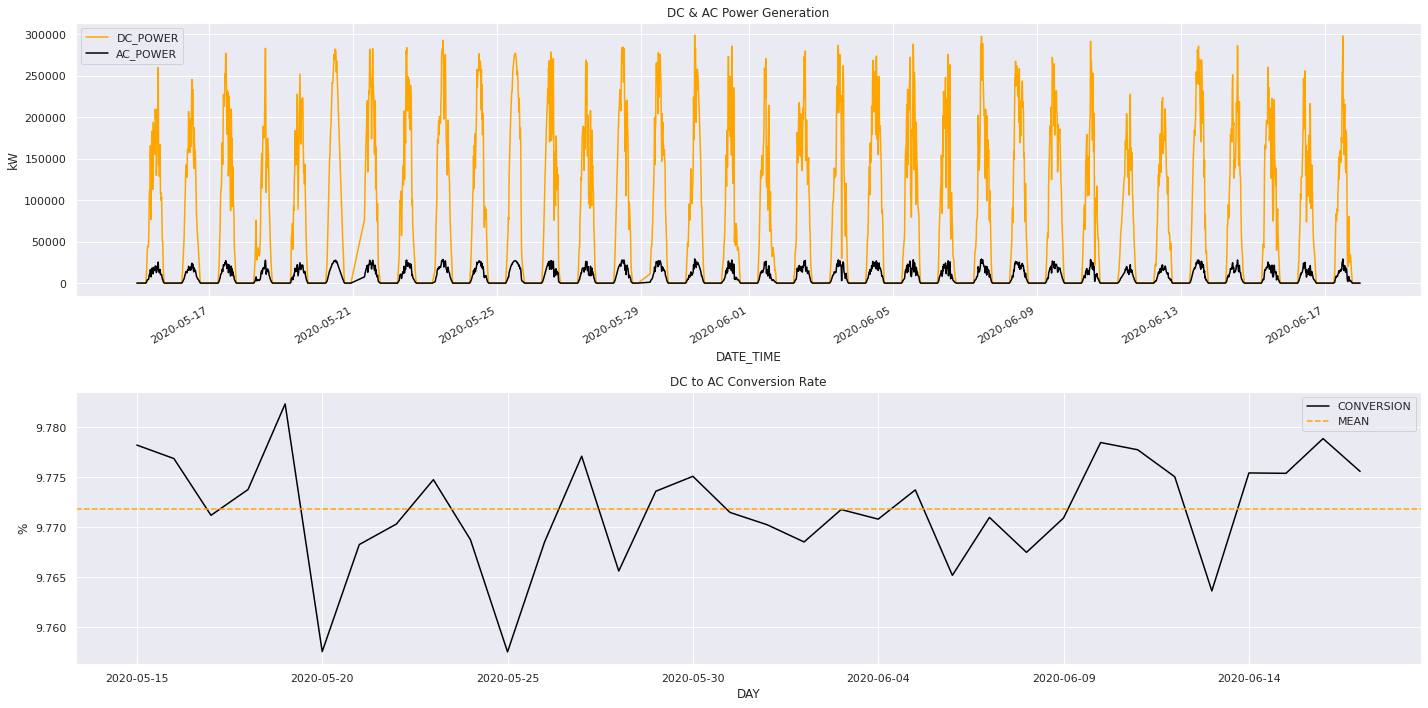

In [21]:
sns.set()

# get DC_POWER generated by all inverters every 15 minutes
# change aggfunc to sum as default is mean
gen_dc_df = df.pivot_table(values='DC_POWER', 
                           index='DATE_TIME', 
                           aggfunc=np.sum)

# get AC_POWER generated by all inverters every 15 minutes
gen_ac_df = df.pivot_table(values='AC_POWER', 
                           index='DATE_TIME', 
                           aggfunc=np.sum)

# calculate the % of DC_POWER converted to AC_POWER
df['CONVERSION'] = (df['AC_POWER']/df['DC_POWER'])*100

# get % of DC_POWER convered to AC_POWER per day
gen_conv_df = df.pivot_table(values='CONVERSION', 
                             index='DAY')

# work on our figure
fig, ax = plt.subplots(2,1, figsize=(20,10))

# fill the dress out
gen_dc_df.plot(color='orange', ax=ax[0])
gen_ac_df.plot(color='black', ax=ax[0])

ax[0].set_title('DC & AC Power Generation')
ax[0].set_ylabel('kW')

gen_conv_df.plot(color='black', ax=ax[1])

ax[1].set_title('DC to AC Conversion Rate')
ax[1].set_ylabel('%')

# set mean of % DC to AC power converson and draw horizontal line
plt.axhline(float(gen_conv_df.mean()),linestyle='--',color='orange',label='MEAN')

plt.legend()

#tighten it up
plt.tight_layout()

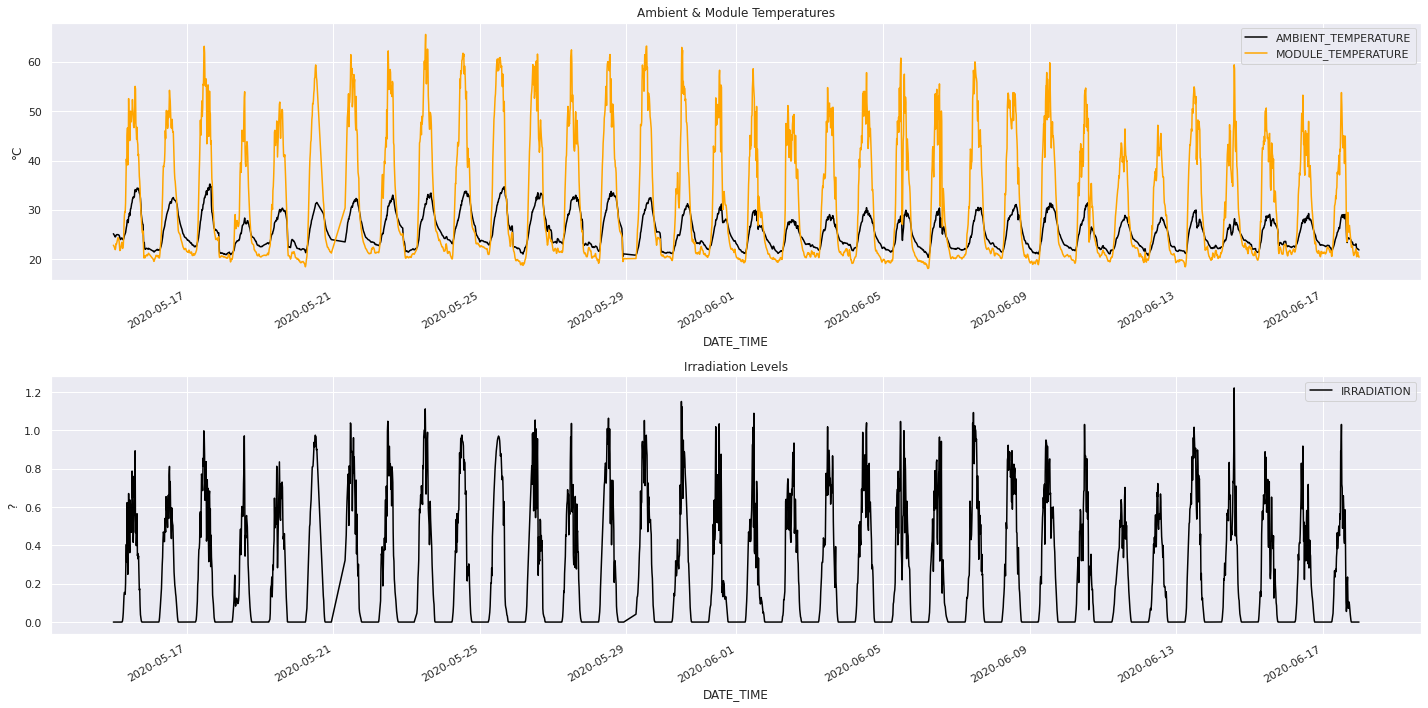

In [22]:
sns.set()

# get our AMBIENT_TEMPERATURE and MODULE_TEMPERATURE by our 15 min intervals
amb_temp_df = df.pivot_table(values='AMBIENT_TEMPERATURE', 
                             index='DATE_TIME')
mod_temp_df = df.pivot_table(values='MODULE_TEMPERATURE', 
                             index='DATE_TIME')

# get IRRADIATION by our 15 min intervals by our 15 min intervals
irr_df = df.pivot_table(values='IRRADIATION', 
                        index='DATE_TIME')

# work on our figure
fig, ax = plt.subplots(2,1, figsize=(20,10))

amb_temp_df.plot(color='black', ax=ax[0])
mod_temp_df.plot(color='orange', ax=ax[0])

ax[0].set_title('Ambient & Module Temperatures')
ax[0].set_ylabel('°C')

irr_df.plot(color='black', ax=ax[1])

ax[1].set_title('Irradiation Levels')
ax[1].set_ylabel('?')

plt.legend()

#tighten it up
plt.tight_layout()

Below, it is especially important to pivot or unstack daily DC power generation and yield. As we discovered above, some inverters are missing rows for some time slots entirely. By unstacking or pivoting, we can create rows with NULL values so long as there is data in those time slots for other days.
<br />
<br />
If we were to, for example, groupby DATE_TIME on individual days, the missing values would remain missing and would plot as unbroken lines. While the X-axis would still show the times appropriately, that is easy to miss and the visual would become misleading. By pivoting, our plotted lines break where NULL values are present.
<br />
<br />
In this case, we can easily see that on 5/19 and 5/20 (as well as a couple of other days), there is data missing for significant portions of time. Considering this data is collated from all inverters at the plant, there must have been a plant-wide issue to cause the missing values.

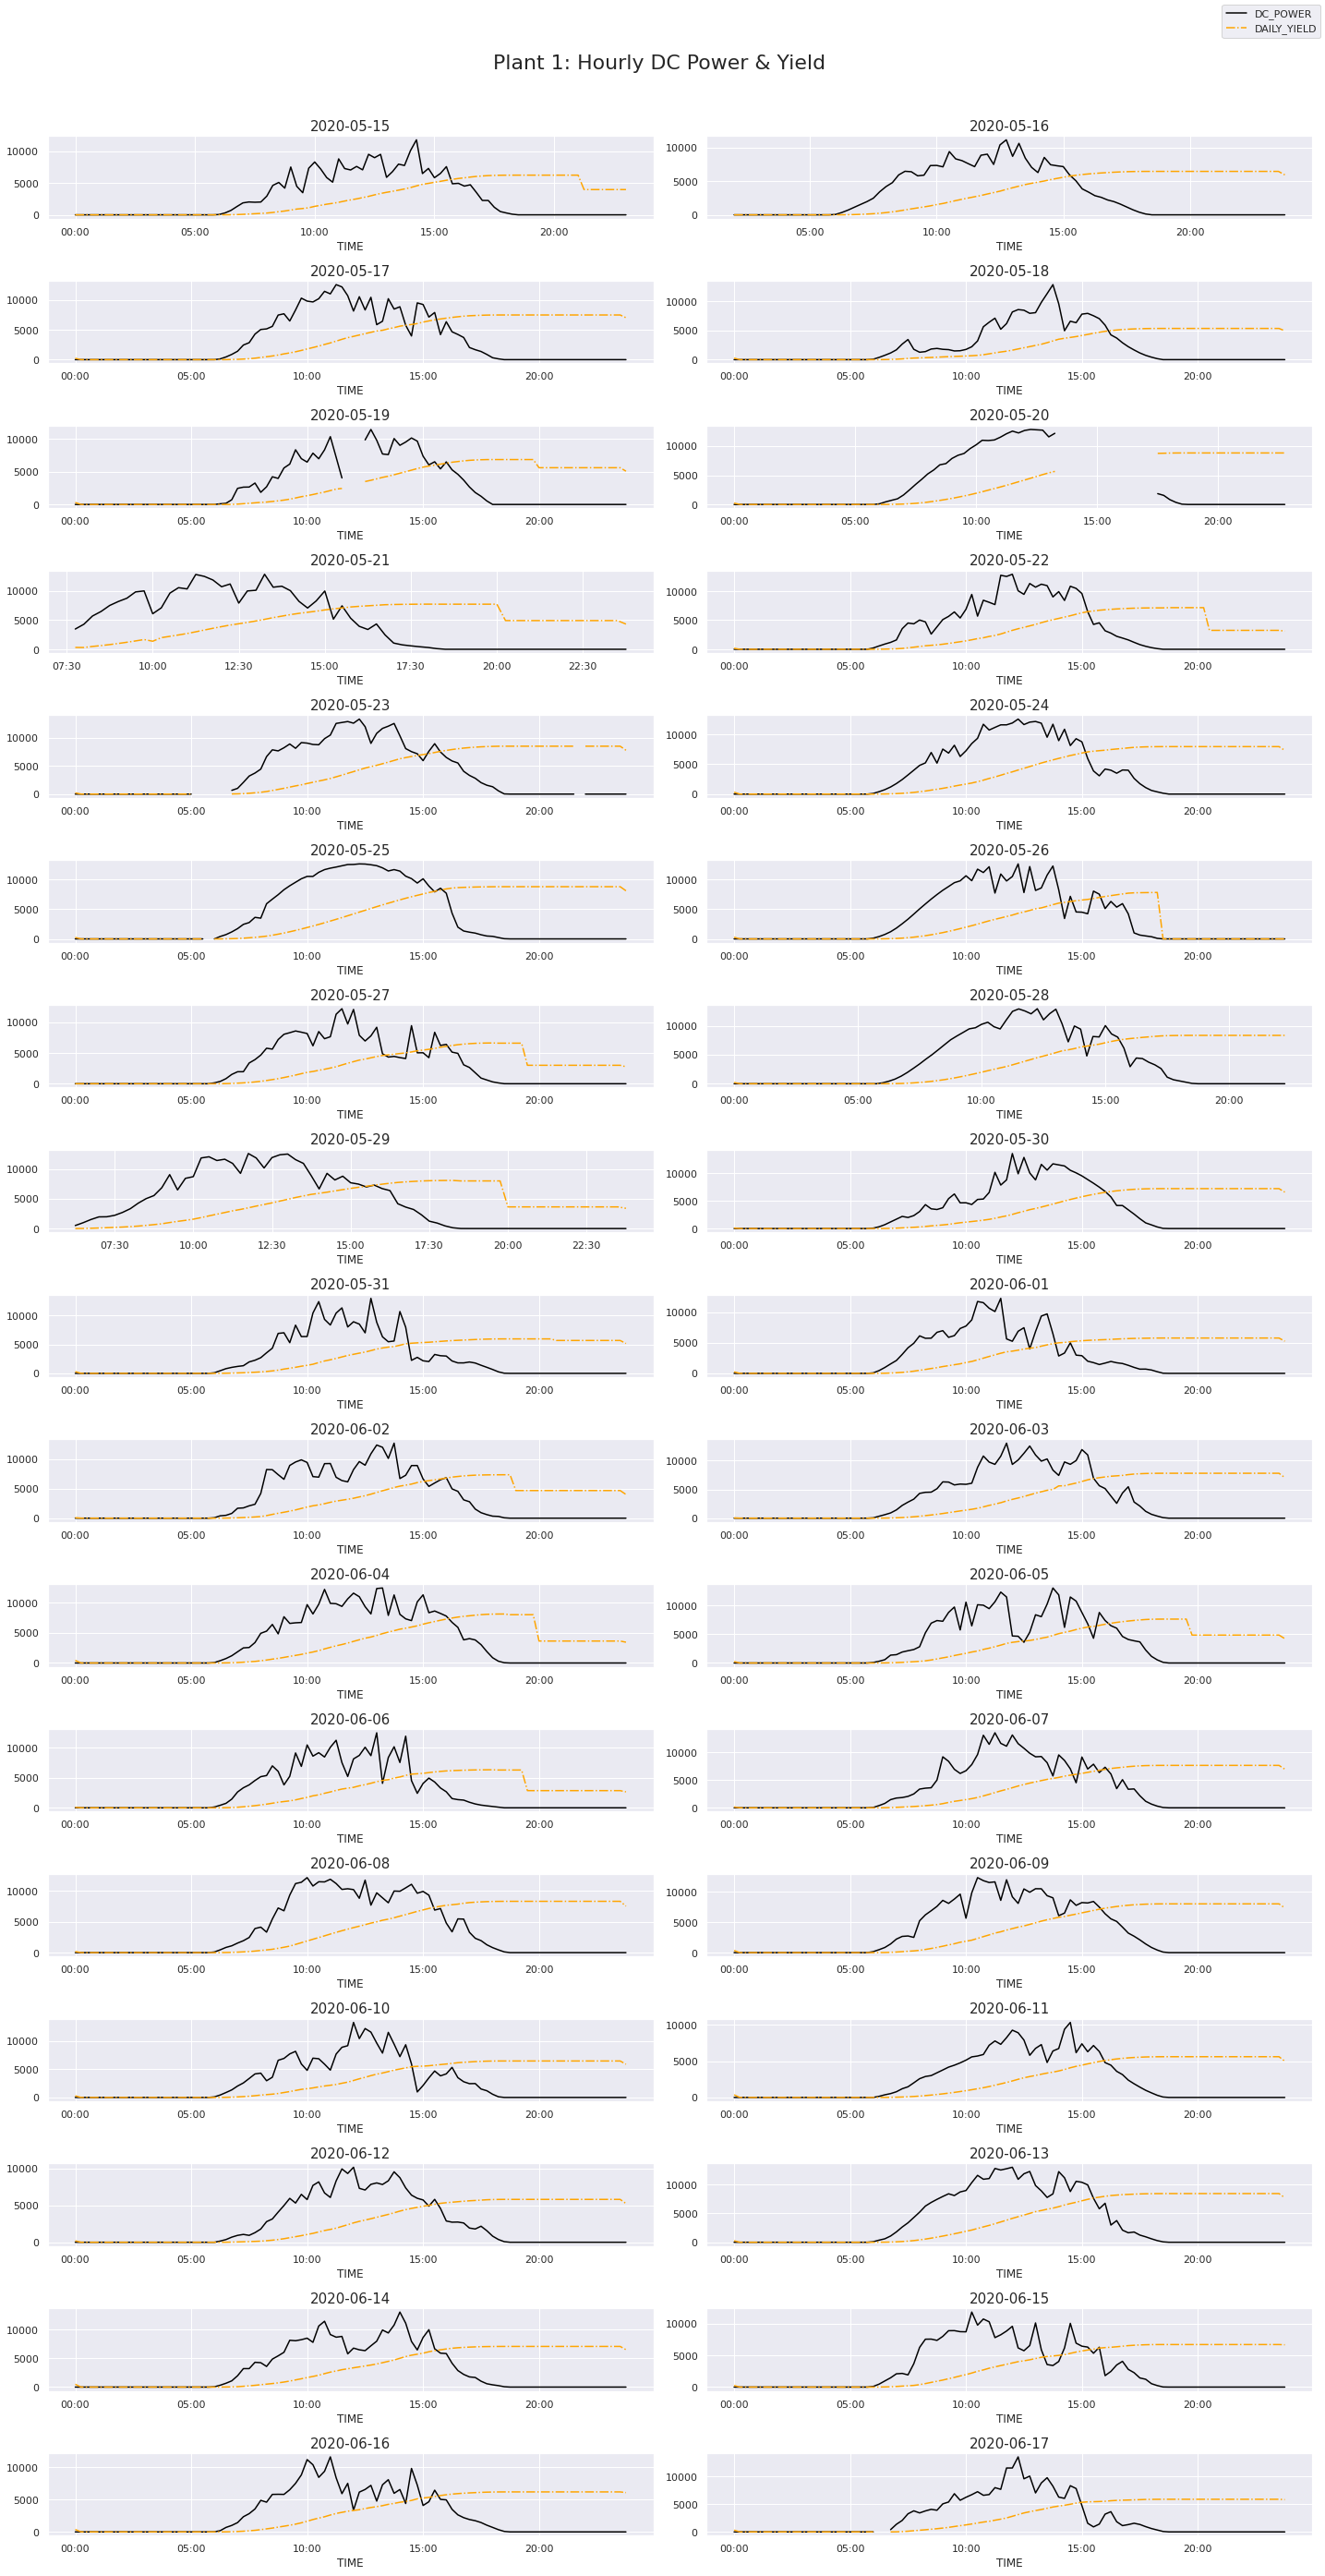

In [23]:
sns.set()

# get each day's DC_POWER by 15 minute interval
daily_dc_df = df.pivot_table(values='DC_POWER', 
                             index='TIME', 
                             columns='DAY')

# get each day's DAILY_YIELD generation by 15 minute interval
daily_yield_df = df.pivot_table(values='DAILY_YIELD', 
                                index='TIME', 
                                columns='DAY')

fig, ax = plt.subplots(17, 2, figsize=(20,40)) 

daily_dc_df.plot(subplots=True, 
                 ax=ax, 
                 color='black')

daily_yield_df.plot(subplots=True, 
                    style='-.', 
                    ax=ax, 
                    color='orange')

# add subplot titles, remove redundant legends
i = 0 
for x in ax.reshape(-1): 
  x.set_title(daily_dc_df.columns[i],size=15)
  x.get_legend().remove()
  i+=1

# add figure title and legend
fig.suptitle('Plant 1: Hourly DC Power & Yield', fontsize=22)
fig.legend(['DC_POWER','DAILY_YIELD'])

fig.tight_layout(rect=[0, 0.03, 1, .96])

plt.show()

### 5.2. Generator-Level Insights
The following plots allow us to take a look at specific generators during our chosen timeframe and compare their performance to the mean of all generators' performance in the same timeframe.

Below we'll declare some variables that we can propagate through our various visualizations.

In [24]:
# select a date range
start_date = pd.to_datetime('2020-05-19 00:00:00')
end_date = pd.to_datetime('2020-05-19 23:59:59')

date_mask = (df['DATE_TIME'] > start_date) & (df['DATE_TIME'] <= end_date)

# select a source for single-inverter views
# source = 'bvBOhCH3iADSZry'
source = 'adLQvlD726eNBSB'

source_mask = (df['SOURCE_KEY_x'] == source)

#### 5.2.1. Generator Yield (Quarterly)

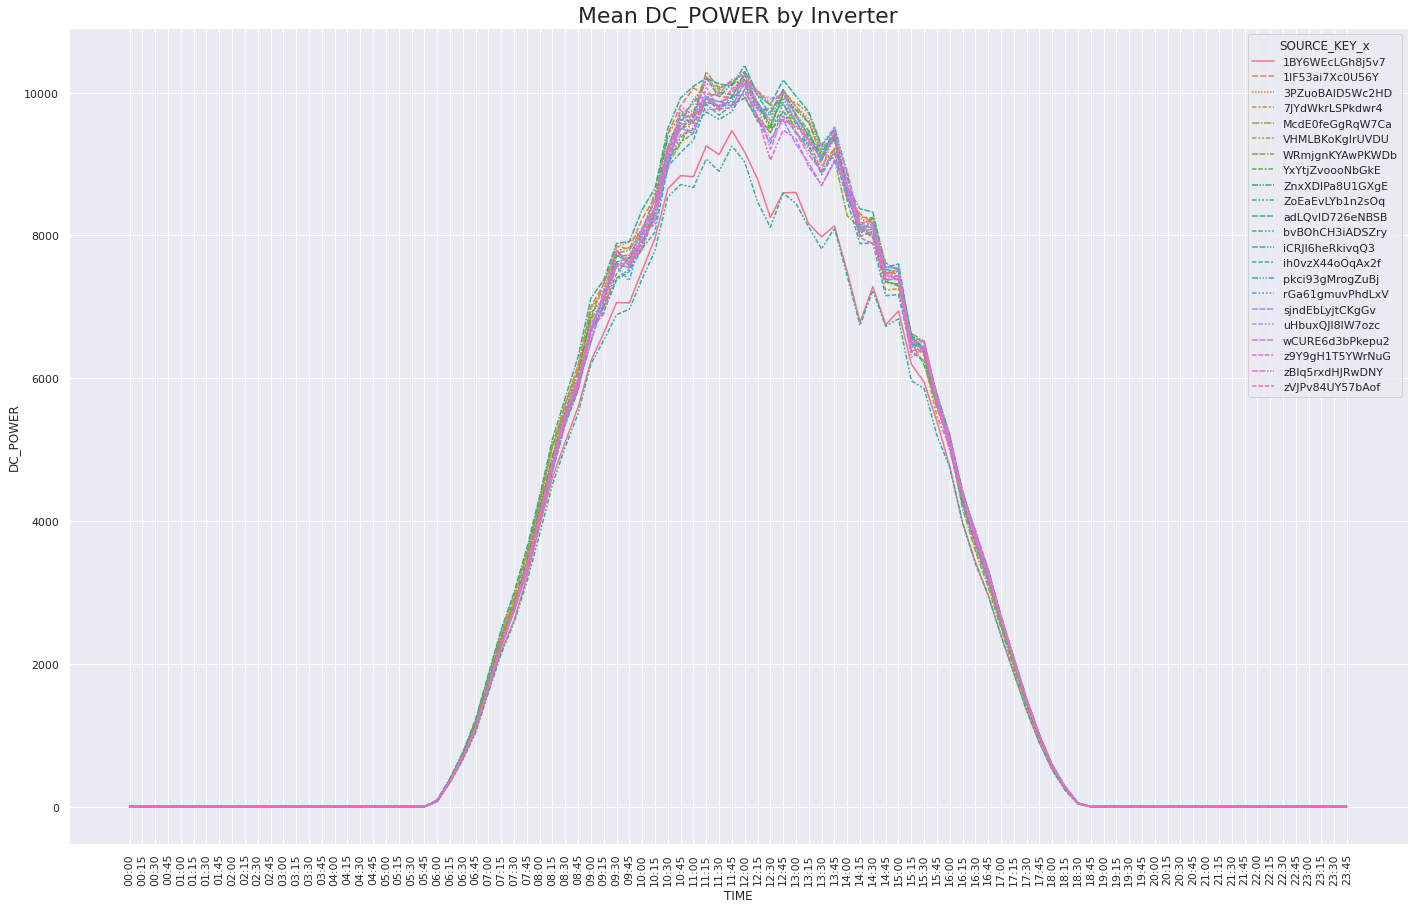

In [25]:
# get the mean DC_POWER for each 15 min interval, for all days
quarterly_mean_df = df.groupby(['SOURCE_KEY_x', 'TIME'])['DC_POWER'] \
                                                        .mean()
                                                        .reset_index()

sns.set()

ax, fig = plt.subplots(figsize=(24, 15))

sns.lineplot(data=quarterly_mean_df, 
             x="TIME", 
             y="DC_POWER", 
             hue="SOURCE_KEY_x", 
             style='SOURCE_KEY_x')

plt.title('Mean DC_POWER by Inverter', fontsize=18)

plt.xticks(rotation=90)

plt.show()

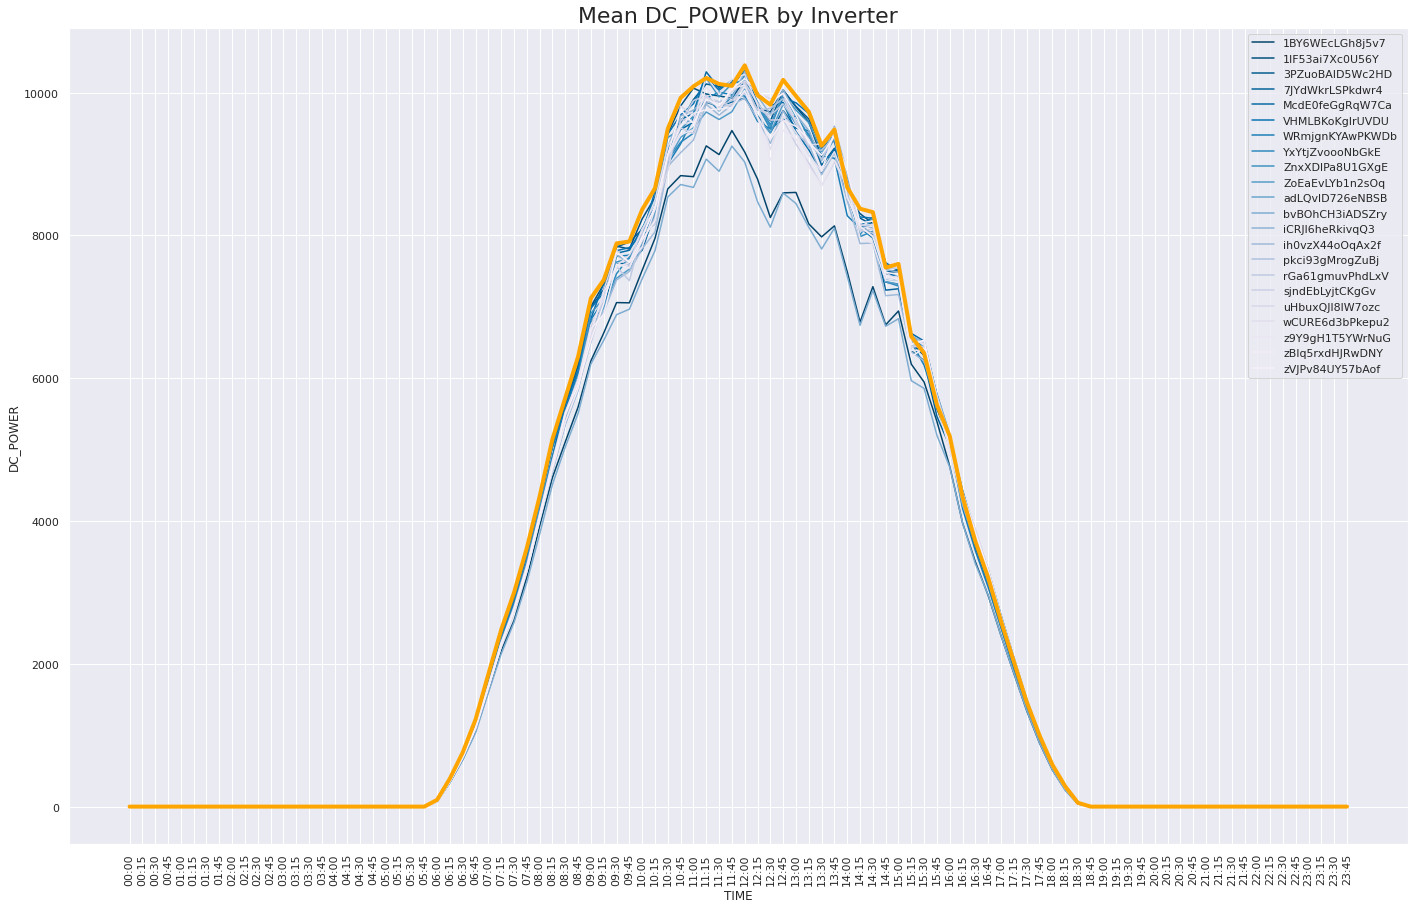

In [26]:
single_source_df = quarterly_mean_df.loc[source_mask]

ax, fig = plt.subplots(figsize=(24, 15))

sns.lineplot(data=quarterly_mean_df, 
             x="TIME", 
             y="DC_POWER", 
             hue="SOURCE_KEY_x", 
             palette='PuBu_r')

sns.lineplot(data=single_source_df, 
             x="TIME", 
             y="DC_POWER", 
             linewidth=4, 
             color='orange')

plt.title('Mean DC_POWER by Inverter', fontsize=18)

plt.xticks(rotation=90)

plt.show()

#### 5.2.2. Generator Yield (Hourly)

First, let’s prepare the DataFrames we need.

In [27]:
# DataFrames for plotting

# mean of hourly DC power of all sources during designated dates
all_hr_dcavg_df = df.loc[date_mask].groupby(['HOUR'])['DC_POWER'] \
                                                    .mean()
                                                    .reset_index()

# mean of hourly AC power of all sources during designated dates
all_hr_acavg_df = df.loc[date_mask].groupby(['HOUR'])['AC_POWER'] \
                                                    .mean()
                                                    .reset_index()

# mean of hourly DC power for specific source during designated dates
src_hour_dc_df = df.loc[source_mask & date_mask] \
                   .pivot_table(values='DC_POWER', 
                                index='HOUR', 
                                columns='SOURCE_KEY_x')

# mean of hourly AC power for specific source during designated dates
src_hour_ac_df = df.loc[source_mask & date_mask] \
                   .pivot_table(values='AC_POWER', 
                                index='HOUR', 
                                columns='SOURCE_KEY_x')

# mean of hourly DC_YIELD for specific source during designated dates
src_daily_yield_df = df.loc[source_mask & date_mask] \
                       .pivot_table(values='DAILY_YIELD', 
                                    index='HOUR', 
                                    columns='SOURCE_KEY_x')


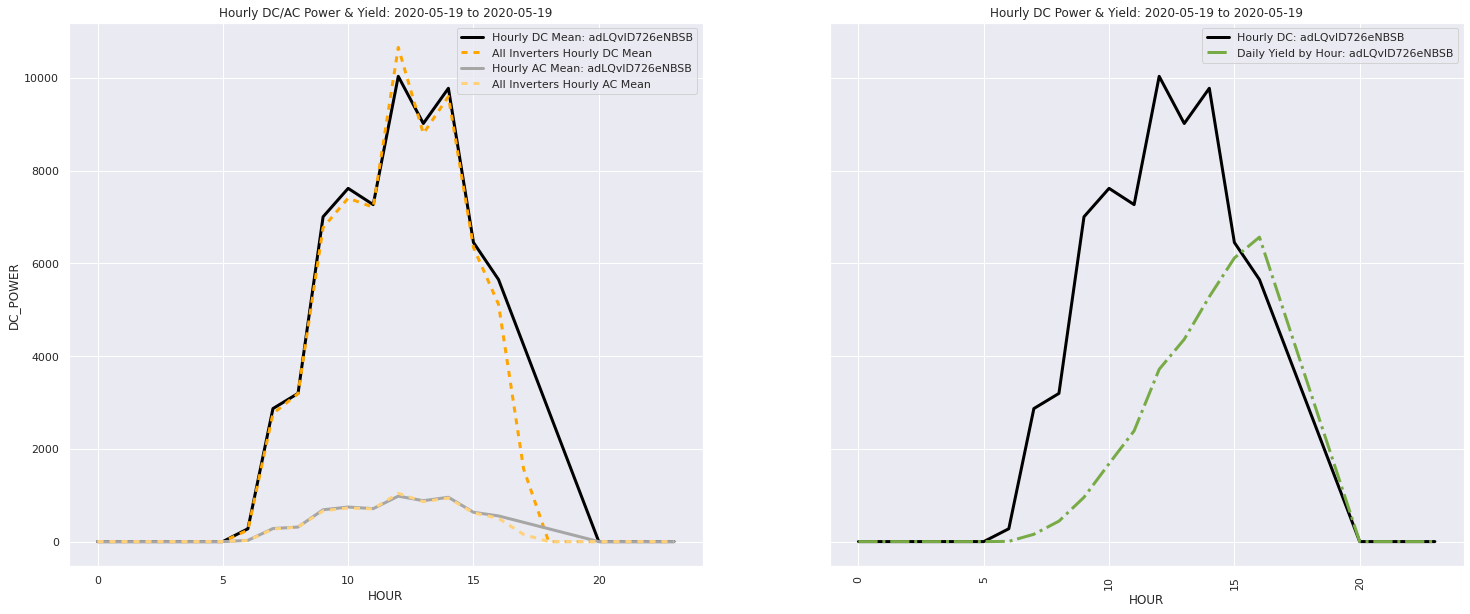

In [31]:
sns.set()

fig, ax = plt.subplots(1,2, figsize=(25,10), sharey=True)

# ax[0]
# plot hourly mean DC for specific inverter  
src_hour_dc_df.plot(linewidth=3,
                    color='black', 
                    ax=ax[0])

# plot hourly mean DC for all inverters  
sns.lineplot(data=all_hr_dcavg_df, 
             x="HOUR", 
             y="DC_POWER",
             style=True, 
             dashes=[(2,2)], 
             legend=False, 
             linewidth=3,
             color='orange', 
             ax=ax[0])

# plot hourly mean AC for specific inverter  
src_hour_ac_df.plot(linewidth=3, 
                    color='#a6a6a6', 
                    ax=ax[0])

# plot hourly mean AC for all inverters  
sns.lineplot(data=all_hr_acavg_df, 
             x="HOUR", 
             y="AC_POWER", 
             style=True, 
             dashes=[(2,2)], 
             legend=False, 
             linewidth=3,
             color='#ffd17a',
             ax=ax[0])

# ax[1]
# plot hourly mean DC for specific inverter  
src_hour_dc_df.plot(linewidth=3, 
                    color='black', 
                    ax=ax[1])

# plot hourly mean daily yield for specific inverter
src_daily_yield_df.plot(subplots=True, 
                        style='-.', 
                        linewidth=3, 
                        color='#78AB46', 
                        ax=ax[1])

# set titles and legends
ax[0].set_title(f'Hourly DC/AC Power & Yield: {title_start_date} to {title_end_date}')
ax[0].legend([f'Hourly DC Mean: {source}', 
              'All Inverters Hourly DC Mean', 
              f'Hourly AC Mean: {source}', 
              'All Inverters Hourly AC Mean'])

ax[1].set_title(f'Hourly DC Power & Yield: {title_start_date} to {title_end_date}')
ax[1].legend([f'Hourly DC: {source}', 
              f'Daily Yield by Hour: {source}'])

plt.xticks(rotation=90)

plt.show()

###5.3. Corrleation Analysis

In [32]:
scaler = RobustScaler()

# drop columns that are objects, dates, non-continuous values
df_to_scale = df.drop(['DATE_TIME',	
                       'PLANT_ID',	
                       'SOURCE_KEY_x', 
                       'SOURCE_KEY_y', 
                       'DAY','TIME', 
                       'MONTH', 
                       'HOUR', 
                       'CONVERSION' ], axis=1)

df_to_scale = df_to_scale[~(df['DC_POWER'] == 0)]

# fit and transform the data
df_scaled = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(df_scaled, index=df_to_scale.index, columns=df_to_scale.columns)

df_scaled.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
510,-0.909376,-0.912207,-0.715376,-1.174803,-0.774953,-0.997281,-0.871665
511,-0.906869,-0.909732,-0.715376,-1.275340,-0.774953,-0.997281,-0.871665
512,-0.906179,-0.909068,-0.715376,-0.210414,-0.774953,-0.997281,-0.871665
513,-0.906113,-0.909001,-0.715376,0.604326,-0.774953,-0.997281,-0.871665
514,-0.906735,-0.909595,-0.715376,0.016321,-0.774953,-0.997281,-0.871665


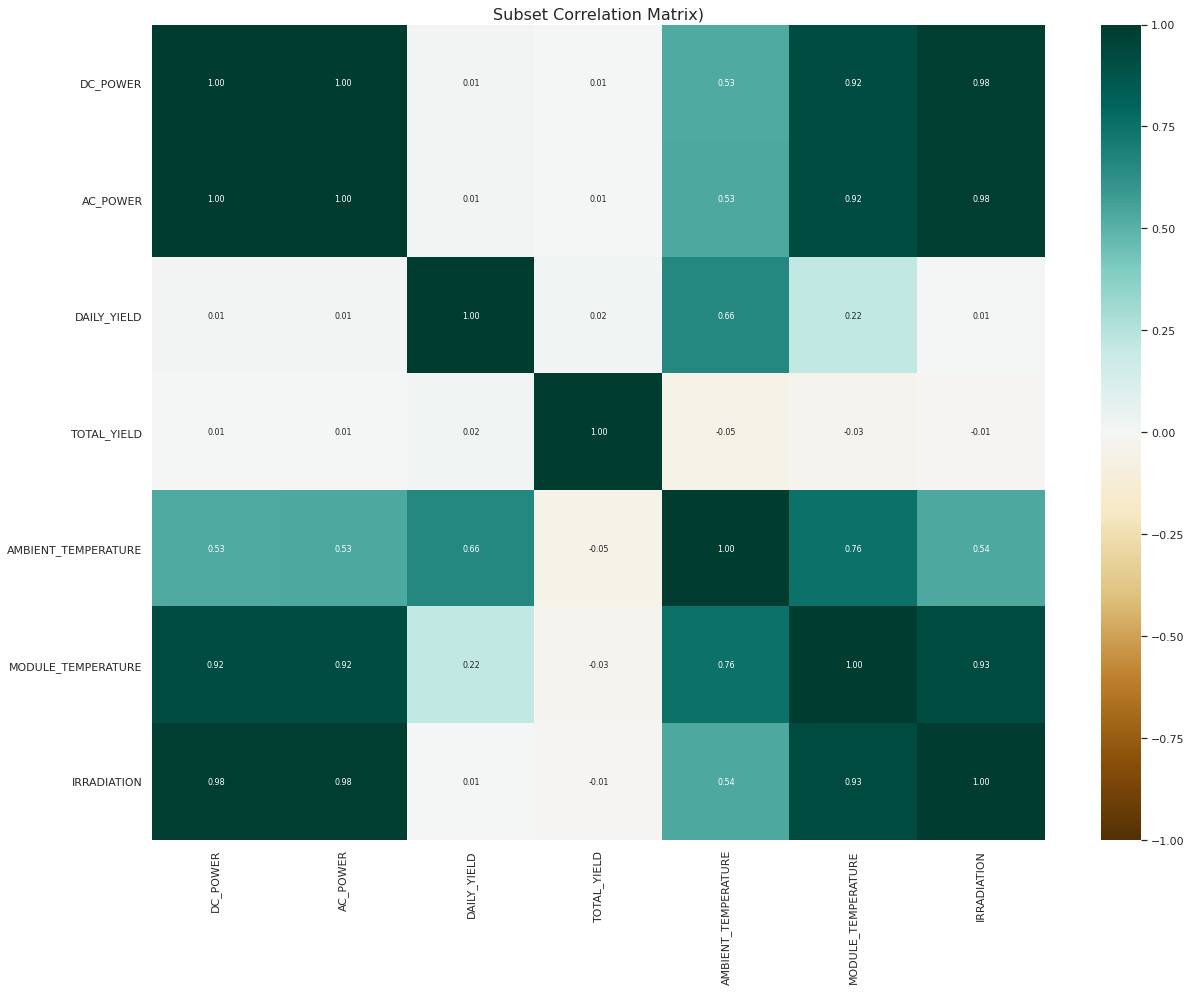

In [33]:
sns.set()

f, ax = plt.subplots(figsize=(20,15))

labels=df_scaled.columns

sns.heatmap(df_scaled.corr(), 
            annot=True, 
            fmt='.2f', 
            cmap='BrBG', 
            annot_kws={'size':8}, 
            vmin=-1, 
            vmax=1)

ax.set_title('Subset Correlation Matrix)', fontsize=16)
ax.set_yticklabels(labels, minor=False)

plt.show()